
# Twitter Sentiment Analysis for Apple and Google Products

## Summary

This project performs sentiment analysis on Twitter data from CrowdFlower for Apple and Google product lines. The purpose of this modelling is to understand the customer sentiment in regard to the products of these companies, developing both a binary and multiclass classification problem. Following NLP text pre-processing, feature extraction will be performed along with a series of machine learning modelling using Logistic Regression, Random Forest, and Support Vector Machines (SVM). The best model will be identified by accuracy, precision, recall, and F1-score metrics. Therefore, this sentiment analysis will be able to capture key insights on customer perceptions and allow businesses to fine-tune marketing and product strategies accordingly

## Business Understanding

The aim of this analysis is to understand how customers view the products of Apple and Google through tweets. Knowing whether public sentiment is positive, negative, or neutral is very helpful for product teams, marketing departments, and customer service units. It serves usefully in the following ways:

Improve product features: Companies are then able to identify which products or features are viewed positively or negatively and can then focus on changes in those areas to improve customer satisfaction.
This information can later be used to fine-tune marketing strategies: positive sentiment can be used in promotional campaigns, while negative sentiment may show the best avenue through which one can engage the customer.
Brand health monitoring: Overall brand perception allows you to understand customer loyalty and brand reputation.

##  Data Understanding

The dataset comes from CrowdFlower and contains Twitter sentiment data about Apple and Google products. Key features of the dataset include:

-  tweet_text: The main text of the tweets (free text data).
- emotion_in_tweet_is_directed_at:  The dataset identifies whether a tweet is about an Apple product or a Google product.
- is_there_an_emotion_directed_at_a_brand_or_product : The dataset is labeled with sentiment categories such as positive, negative, and neutral. There are also some cases labeled as "can't tell."

#### 1.Import neccessary libraries

In [6]:
#importing the neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


#### 2.Load and Inspect data

In [7]:
# Class creation

class DataUnderstanding:
  """Class for understanding the characteristics of the dataset"""
  def __init__(self, data= None):
    """Initialize the class with a DataFrame"""
    self.df= data

  def load_data(self, path):
    """Load data from a CSV file"""
    if self.df is None:
      self.df = pd.read_csv(path, encoding= 'latin-1')
    return self.df

  def preview_df(self):
    """Preview the DataFrame"""
    print("\n\nHEAD")
    print("-"*22)
    print(self.df.head())

  def display_info(self):
    """Display information about the DataFrame"""
    print("\n\nINFO")
    print("-"*22)
    print(self.df.info())

  def display_shape(self):
    """Display the shape of the DataFrame"""
    print("\n\nSHAPE")
    print("-"*22)
    print(f"Records: {self.df.shape[0]}, Features: {self.df.shape[1]}")

  def display_columns(self):
    """Display the columns in the dataset."""
    print("\nCOLUMNS")
    print("-" *22)
    for col in self.df.columns:
      print(f"- {col}")


  def display_missing_values(self):
    """Display missing values in each column"""
    print("\n\nMISSING VALUES")
    print("-"*22)
    for col in self.df.columns:
      print(f"{col}: {self.df[col].isnull().sum()}")

  def display_duplicates(self):
    """Display duplicate records in the DataFrame"""
    print("\n\nDUPLICATES")
    print("-"*22)
    print(f"Duplicate records: {self.df.duplicated().sum()}")

  def understand_data(self):
    """Display dataset overview"""
    self.preview_df()
    self.display_info()
    self.display_shape()
    self.display_columns()
    self.display_missing_values()
    self.display_duplicates()




In [8]:
# Load Data

data_und = DataUnderstanding()

df = data_und.load_data('/content/judge-1377884607_tweet_product_company.csv')

data_und.understand_data()



HEAD
----------------------
                                          tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   

  is_there_an_emotion_directed_at_a_brand_or_product  
0                                   Negative emotion  
1                                   Positive emotion  
2                                   Positive emotion  
3                                   Negative emotion  
4                                   Positive emotion  


INFO
----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

In essence, the dataset is designed to analyze sentiment, whether positive or negative, from tweets involving different products or brands.

The majority of these tweets - 5802 - don't specify any product or brand for which some decisions may be required in pre-processing.

The dataset is fairly clean; there are a few missing values in the 'tweet_text' and 'emotion_in_tweet_is_directed_at' columns and few duplicates.

#### 3.Data Cleaning

In [9]:
#renaming columns for easier reference

df.rename (columns= {
    'tweet_text': 'tweets',
    'emotion_in_tweet_is_directed_at': 'product',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'emotion'
}, inplace=True)

In [10]:
# Handling duplicates

df.drop_duplicates(subset= 'tweets', inplace= True)

Handling missing values

In [11]:
# Drop the 1 in tweets column
df = df.dropna(subset=['tweets'])

In [12]:
# imputing missing values in product column with data from tweets

product_list = df['product'].unique()
product_list = [product for product in product_list if str(product) != 'nan']

def extract_product(tweet):
    for product in product_list:
        if product.lower() in tweet.lower():
            return product
    return None

df.loc[:, 'product']  = df.apply(lambda x: extract_product(x['tweets']) if pd.isna(x['product']) else x['product'], axis=1,)

df.head(5)

,tweets,product,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [13]:
df['product'].isnull().sum()

759

In [14]:
# drop the remaining
df = df.dropna(subset=['product'])

In [15]:
#check distribution of emotions
df['emotion'].value_counts()

,count
emotion,
No emotion toward brand or product,4633
Positive emotion,2955
Negative emotion,568
I can't tell,150


In [16]:
#drop records where emotion is i can't tell
df = df.drop(df[df['emotion'] == "I can't tell"].index)

In [17]:
# label emotion as 'positive', 'negative' and 'neutral'
df.loc[:, 'sentiment'] = df['emotion'].apply(lambda x: 'positive' if x == 'Positive emotion' else ('negative' if x == 'Negative emotion' else 'neutral'))
df.head()

,tweets,product,emotion,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,positive


In [18]:
#Ensure cleaning process worked effectively
data_und = DataUnderstanding(df)

data_und.understand_data()



HEAD
----------------------
                                              tweets             product  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...              iPhone   
1  @jessedee Know about @fludapp ? Awesome iPad/i...  iPad or iPhone App   
2  @swonderlin Can not wait for #iPad 2 also. The...                iPad   
3  @sxsw I hope this year's festival isn't as cra...  iPad or iPhone App   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...              Google   

            emotion sentiment  
0  Negative emotion  negative  
1  Positive emotion  positive  
2  Positive emotion  positive  
3  Negative emotion  negative  
4  Positive emotion  positive  


INFO
----------------------
<class 'pandas.core.frame.DataFrame'>
Index: 8156 entries, 0 to 9092
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweets     8156 non-null   object
 1   product    8156 non-null   object
 2   emotion    8156 non-null   ob

#### 4.Exploratory Data Analysis

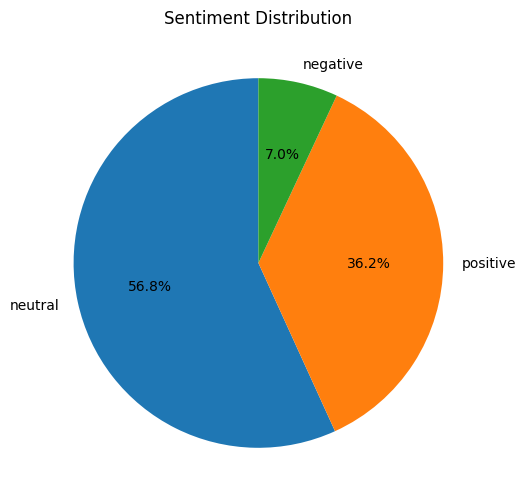

In [19]:
#sentiment distribution
sentiment_counts = df['sentiment'].value_counts()

# piechart
plt.figure(figsize=(8, 6))
labels= sentiment_counts.index
plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.show()


Class Imbalance is evident, seeing as more than 50% of the tweets convey neutral emotion and approximately 7% convey negative emotion.

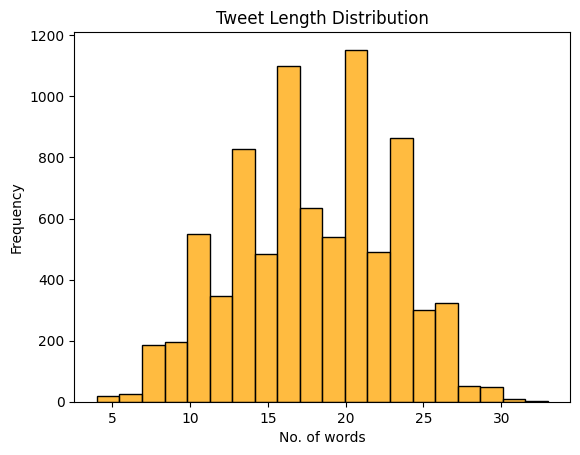

In [20]:
# tweet length distribution
df['tweet_length'] = df['tweets'].apply(lambda x: len(x.split()))

sns.histplot(df['tweet_length'], bins=20, color= 'orange')
plt.title('Tweet Length Distribution')
plt.xlabel('No. of words')
plt.ylabel('Frequency')
plt.show()


The tweets range between 4 and 33 words

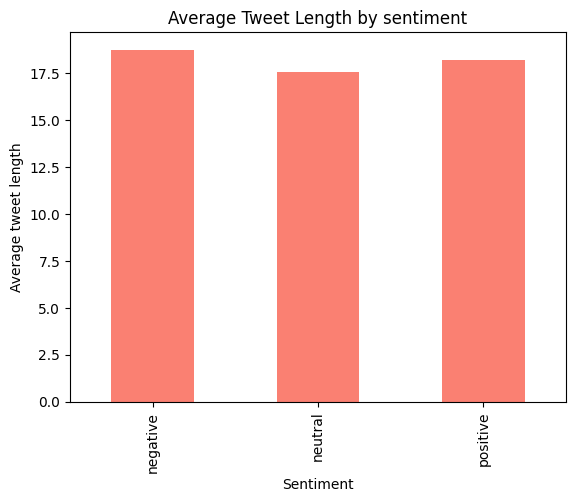

In [21]:
#Class Distribution by tweet length
df.groupby('sentiment')['tweet_length'].mean().plot(kind='bar', color= 'salmon')
plt.title('Average Tweet Length by sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average tweet length')
plt.show()


The bar chart indicates that the average tweet length for all three sentiment categories (positive, negative, and neutral) is almost equal, ranging between 17 to 18 words, suggesting that tweet length is consistent across different sentiments.

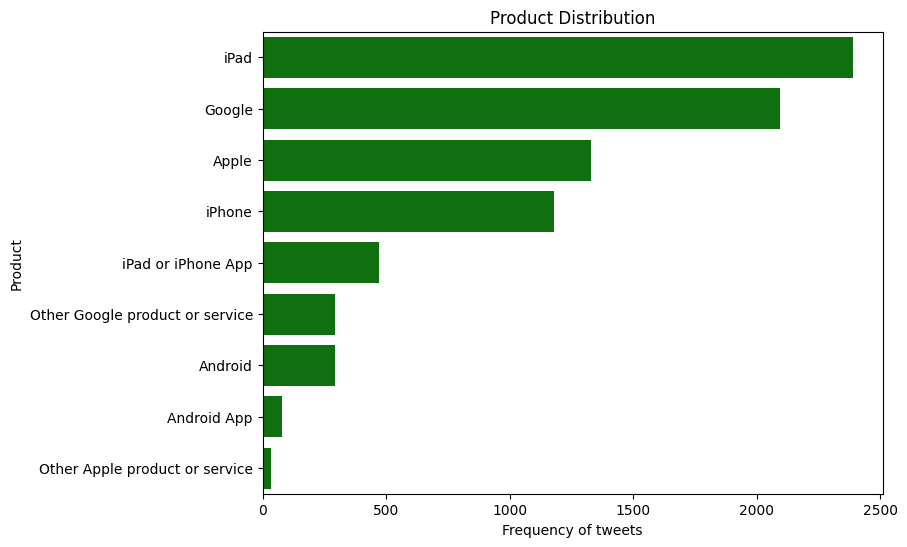

,count
product,
iPad,2390
Google,2093
Apple,1328
iPhone,1178
iPad or iPhone App,469
Other Google product or service,292
Android,291
Android App,80
Other Apple product or service,35


In [22]:
#Distribution of products
product_counts= df['product'].value_counts()

plt.figure(figsize= (8, 6))
labels= product_counts.index
sns.barplot(x= product_counts, y= labels, color= 'green')
plt.title('Product Distribution')
plt.xlabel('Frequency of tweets')
plt.ylabel('Product')
plt.show()

product_counts

The distribution plot of product distribution shows that iPad is the most mentioned product among the tweets, followed by Google and Apple, which proves these brands are on the hotlist and much discussed, whereas the rest of the products like Android and Apple services have been talked about far less.

<Figure size 800x600 with 0 Axes>

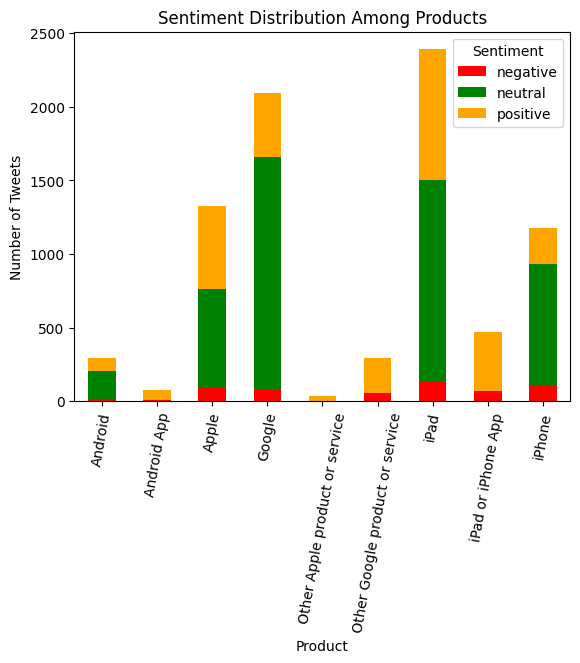

In [23]:
#Sentiment distribution for each product
product_sentiment_counts = df.groupby('product')['sentiment'].value_counts().unstack().fillna(0)

#plot
plt.figure(figsize=(8, 6))

# Plot the sentiment distribution for each product
product_sentiment_counts.plot(kind='bar', stacked=True, color=['red', 'green', 'orange'])

plt.title('Sentiment Distribution Among Products')
plt.xlabel('Product')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=80)
plt.legend(title='Sentiment', labels=product_sentiment_counts.columns)

plt.show()


#### 5.Data Preprocessing

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import TransformerMixin
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [25]:
# text preprocessing

class TextCleaner(TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        def clean_text(text):
            text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
            text = re.sub(r'@\w+', '', text)  # Remove mentions
            text = re.sub(r'#\w+', '', text)  # Remove hashtags
            text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters and numbers
            text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
            return text
        return [clean_text(text) for text in X]

class LowerCaseConverter(TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [text.lower() for text in X]

class StopwordRemover(TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        stop_words = set(stopwords.words('english'))
        return [' '.join([word for word in text.split() if word not in stop_words]) for text in X]

class Tokenizer(TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [word_tokenize(text) for text in X]

class Lemmatizer(TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        lemmatizer = WordNetLemmatizer()
        # Process each token list and lemmatize tokens
        return [[lemmatizer.lemmatize(word) for word in tokens] for tokens in X]



In [26]:
# Pipeline for text preprocessing
text_preprocessing_pipeline = Pipeline([
    ('cleaner', TextCleaner()),
    ('lower_case_converter', LowerCaseConverter()),
    ('stopwords_remover', StopwordRemover()),
    ('tokenizer', Tokenizer()),
    ('lemmatizer', Lemmatizer())
])

df['processed_tweets'] = text_preprocessing_pipeline.fit_transform(df['tweets'])

df['cleaned_tweets'] = df['processed_tweets'].apply(lambda tokens: ' '.join(tokens))

df[['tweets', 'cleaned_tweets']].head(5)


,tweets,cleaned_tweets
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,g iphone hr tweeting dead need upgrade plugin ...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know awesome ipadiphone app youll likely appre...
2,@swonderlin Can not wait for #iPad 2 also. The...,wait also sale
3,@sxsw I hope this year's festival isn't as cra...,hope year festival isnt crashy year iphone app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff fri marissa mayer google tim oreil...


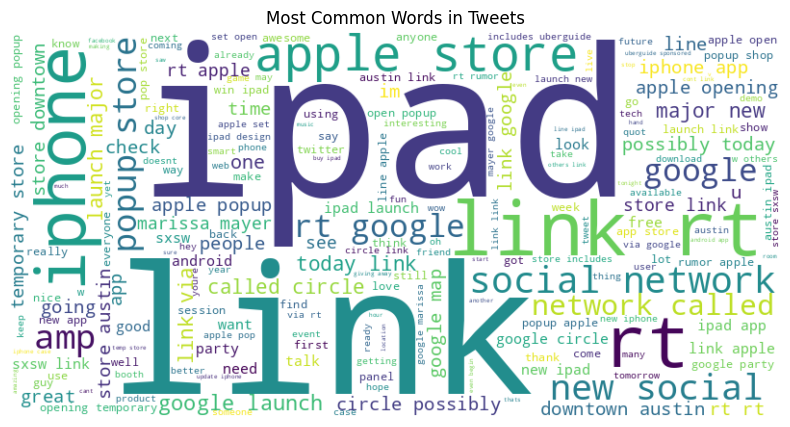

In [27]:
from wordcloud import WordCloud

# Combine all tweets into a single string for word cloud
all_words = ' '.join(df['cleaned_tweets'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Tweets')
plt.show()


#### 6.Feature Extraction

In [80]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
import pickle

In [38]:
# Encode the target variable
label_encoder = LabelEncoder()
df['sentiment_enc'] = label_encoder.fit_transform(df['sentiment'])
df.tail()

,tweets,product,emotion,sentiment,tweet_length,processed_tweets,cleaned_tweets,sentiment_enc
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion,positive,4,"[ipad, everywhere, link]",ipad everywhere link,2
9089,"Wave, buzz... RT @mention We interrupt your re...",Google,No emotion toward brand or product,neutral,18,"[wave, buzz, rt, interrupt, regularly, schedul...",wave buzz rt interrupt regularly scheduled gee...,1
9090,"Google's Zeiger, a physician never reported po...",Google,No emotion toward brand or product,neutral,19,"[google, zeiger, physician, never, reported, p...",google zeiger physician never reported potenti...,1
9091,Some Verizon iPhone customers complained their...,iPhone,No emotion toward brand or product,neutral,23,"[verizon, iphone, customer, complained, time, ...",verizon iphone customer complained time fell b...,1
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,Google,No emotion toward brand or product,neutral,9,"[rt, google, test, checkin, offer, link]",rt google test checkin offer link,1


#### 7.Modelling


In this section we'll handle binary and multi-class classification
The machine learning algorithims used in this section are:
- RandomForest
- Naive Bayes(MultinomialNB)
- LogisticRegression
- DecisionTrees
- support vector machines (SVC)

*A.Binary Classification*

In [39]:
# Filter the dataset to only include positive and negative sentiments
binary_df = df[df['sentiment_enc'].isin([0, 1])].reset_index(drop=True)

X_binary = binary_df['cleaned_tweets']
y_binary = binary_df['sentiment_enc']

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)


In [40]:
# pipeline with Logistic Regression
binary_lr_pipeline = ImbPipeline([
    ('tfidf', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('lr', LogisticRegression(class_weight='balanced'))
])

# Fit the Logistic Regression pipeline to the training data
binary_lr_pipeline.fit(X_train_bin, y_train_bin)

#Predict on the test set
y_pred_lr = binary_lr_pipeline.predict(X_test_bin)

#Evaluation for Logistic Regression
binary_accuracy_lr = accuracy_score(y_test_bin, y_pred_lr)
print(f"Logistic Regression Binary Classification Accuracy: {binary_accuracy_lr:.2f}")
print("Logistic Regression Classification Report:\n", classification_report(y_test_bin, y_pred_lr))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test_bin, y_pred_lr))


Logistic Regression Binary Classification Accuracy: 0.87
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.63      0.50       106
           1       0.96      0.90      0.93       935

    accuracy                           0.87      1041
   macro avg       0.68      0.76      0.71      1041
weighted avg       0.90      0.87      0.88      1041

Logistic Regression Confusion Matrix:
 [[ 67  39]
 [ 96 839]]


In [41]:
#Hyperparameter tuning
lr_param_grid = {
    'lr__C': [0.1, 1, 10, 100],
    'lr__penalty': ['l2'],
    'lr__solver': ['liblinear', 'lbfgs']
}

lr_grid_search = GridSearchCV(binary_lr_pipeline, lr_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
lr_grid_search.fit(X_train_bin, y_train_bin)

# Prediction using the best model
best_lr_model = lr_grid_search.best_estimator_

y_pred_lr_best = best_lr_model.predict(X_test_bin)

# Evaluation for the best Logistic Regression model
binary_accuracy_lr_best = accuracy_score(y_test_bin, y_pred_lr_best)
print(f"Best Logistic Regression Binary Classification Accuracy: {binary_accuracy_lr_best:.2f}")
print("Best Logistic Regression Classification Report:\n", classification_report(y_test_bin, y_pred_lr_best))
print("Best Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test_bin, y_pred_lr_best))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Logistic Regression Binary Classification Accuracy: 0.90
Best Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.52      0.51       106
           1       0.95      0.94      0.94       935

    accuracy                           0.90      1041
   macro avg       0.72      0.73      0.72      1041
weighted avg       0.90      0.90      0.90      1041

Best Logistic Regression Confusion Matrix:
 [[ 55  51]
 [ 56 879]]


In [42]:
#Pipeline with SVM
binary_svm_pipeline = ImbPipeline([
    ('tfidf', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('svm', SVC(class_weight='balanced', random_state=42))
])

binary_svm_pipeline.fit(X_train_bin, y_train_bin)

#Predict on the test set
y_pred_svm = binary_svm_pipeline.predict(X_test_bin)

#Evaluation
binary_accuracy_svm = accuracy_score(y_test_bin, y_pred_svm)
print(f"SVM Binary Classification Accuracy: {binary_accuracy_svm:.2f}")
print("SVM Classification Report:\n", classification_report(y_test_bin, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test_bin, y_pred_svm))


SVM Binary Classification Accuracy: 0.91
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.24      0.35       106
           1       0.92      0.99      0.95       935

    accuracy                           0.91      1041
   macro avg       0.79      0.61      0.65      1041
weighted avg       0.89      0.91      0.89      1041

SVM Confusion Matrix:
 [[ 25  81]
 [ 13 922]]


In [43]:
# Hyperparameter tuning for SVM using GridSearchCV
svm_param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': ['scale', 'auto'],
    'svm__kernel': ['linear', 'rbf'],
}

svm_grid_search = GridSearchCV(binary_svm_pipeline, svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
svm_grid_search.fit(X_train_bin, y_train_bin)
# Use the best model from the grid search to make predictions
best_svm_model = svm_grid_search.best_estimator_

# Make predictions using the best Logistic Regression model
y_pred_svm_best = best_svm_model.predict(X_test_bin)

# Evaluation for the best Logistic Regression model
binary_accuracy_svm_best = accuracy_score(y_test_bin, y_pred_svm_best)
print(f"Best Logistic Regression Binary Classification Accuracy: {binary_accuracy_svm_best:.2f}")
print("Best Logistic Regression Classification Report:\n", classification_report(y_test_bin, y_pred_svm_best))
print("Best Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test_bin, y_pred_svm_best))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Logistic Regression Binary Classification Accuracy: 0.91
Best Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.28      0.40       106
           1       0.92      0.99      0.95       935

    accuracy                           0.91      1041
   macro avg       0.81      0.63      0.68      1041
weighted avg       0.90      0.91      0.90      1041

Best Logistic Regression Confusion Matrix:
 [[ 30  76]
 [ 13 922]]


In [44]:
# Compare the models
if binary_accuracy_lr_best > binary_accuracy_svm_best:
    print("Logistic Regression is the better model.")
else:
    print("SVM is the better model.")

SVM is the better model.


2. Multiclass Classification

#***countverization***

In [46]:
X = df['cleaned_tweets']
y = df['sentiment_enc']


In [47]:
#countverization
# Vectorization - CV
cv = CountVectorizer()

X_vec = cv.fit_transform(df['cleaned_tweets'])
X_vec = pd.DataFrame.sparse.from_spmatrix(X_vec)
X_vec.columns = sorted(cv.vocabulary_)
X_vec.set_index(y.index, inplace=True)
X_vec = X_vec.iloc[:, 160:]

In [48]:
# SMOTE - CV
smote = SMOTE()
X_cv_smote, y_cv_smote = smote.fit_resample(X_vec, y)



Train Test split-CV

In [49]:
# Train Test and split - CV
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv_smote, y_cv_smote, test_size=0.3, random_state=42)

#### ***TFIDF Vectorization***

In [52]:
# Vectorization - TFIDF
tf = TfidfVectorizer()

X_tf = tf.fit_transform(df['cleaned_tweets'])
X_tf = pd.DataFrame.sparse.from_spmatrix(X_tf)
X_tf.columns = sorted(tf.vocabulary_)
X_tf.set_index(y.index, inplace=True)
X_tf = X_tf.iloc[:, 160:]

In [54]:
# SMOTE - TFIDF
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_tf_smote, y_tf_smote = smote.fit_resample(X_tf, y)

In [55]:
# Train Test and Split - TFIDF
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf_smote, y_tf_smote, test_size=0.3, random_state=42)

In [60]:
def modelling(model, cv=False, tf=False):
    if cv == True:
        # Fit the instantiated model
        model.fit(X_train_cv, y_train_cv)
        # Predict
        y_hat = model.predict(X_test_cv)
        # Results
        print("Count Vectorisation Results\n")
        print("Main Metrics")
        print("-"*12)
        print(f"Accuracy Score {round(accuracy_score(y_test_cv, y_hat), 3)}")
        # Use 'macro' averaging for multiclass classification
        print(f"Recall Score {round(recall_score(y_test_cv, y_hat, average='macro'), 3)}")
        # Classification Report
        print("\nClassification Report")
        print(classification_report(y_test_cv, y_hat))


    elif tf == True:
        # Fit the instantiated model
        model.fit(X_train_tf, y_train_tf)
        # Predict
        y_hat = model.predict(X_test_tf)
        # Results
        print("---------")
        print("TFIDF Vectorisation Results\n")
        print("Main Metrics")
        print("-"*12)
        print(f"Accuracy Score {round(accuracy_score(y_test_tf, y_hat), 3)}")
        # Use 'macro' averaging for multiclass classification
        print(f"Recall Score {round(recall_score(y_test_tf, y_hat, average='macro'), 3)}")
        # Classification Report
        print("\nClassification Report")
        print(classification_report(y_test_tf, y_hat))

def hyper_tuning(model, params, model_name="Random Forest"):
    """This function optimises the base model with the parameters
    passed as params"""
    # Grid Search Base Model
    grid_search_model = GridSearchCV(model, params, cv=5, scoring='accuracy')
    # Count Vectorisation
    # Perform grid search with 5-fold cross-validation for Count Vectorization
    grid_search_rf_cv = grid_search_model.fit(X_train_cv, y_train_cv)

    # Get the best model from grid search for Count Vectorization
    best_rf_model_cv = grid_search_rf_cv.best_estimator_

    # Predict on the test set using the best model for Count Vectorization
    y_pred_cv = best_rf_model_cv.predict(X_test_cv)

    # Calculate and print the accuracy for Count Vectorization
    accuracy_cv = accuracy_score(y_test_cv, y_pred_cv)

    # Calculate and print the recall for Count Vectorization
    recall_cv = recall_score(y_test_cv, y_pred_cv, average ='macro')

    # Results
    print("Count Vectorisation Results\n")
    print(f"Best {model_name.title()} Model (Count Vectorization):\n", best_rf_model_cv)
    print(f"\nTest Accuracy (Count Vectorization): {accuracy_cv:.3f}")
    print(f"\nTest Recall (Count Vectorization): {recall_cv:.3f}")
    print("---------")

    #TFIDF Vectorisation
    grid_search_rf_tf = grid_search_model.fit(X_train_tf, y_train_tf)

    # Get the best model from grid search for TF-IDF Vectorization
    best_rf_model_tf = grid_search_rf_tf.best_estimator_

    # Predict on the test set using the best model for TF-IDF Vectorization
    y_pred_tf = best_rf_model_tf.predict(X_test_tf)

    # Calculate and print the accuracy for TF-IDF Vectorization
    accuracy_tf = accuracy_score(y_test_tf, y_pred_tf)

    # Calculate and print the reacll for TF-IDF Vectorization
    recall_tf= recall_score(y_test_tf, y_pred_tf, average ='macro')

    # Results
    print("\n\nTFIDF Vectorisation Results\n")
    print(f"Best {model_name.title()} Model (TFIDF Vectorization):\n", best_rf_model_tf)
    print(f"\nTest Accuracy (TFIDF Vectorization): {accuracy_tf:.3f}")
    print(f"\nTest Recall (TFIDF Vectorization): {recall_tf:.3f}")

    # models = [best_rf_model_cv, best_rf_model_tf]

    return best_rf_model_cv, best_rf_model_tf

#### ***Model 1 - Multinomial Bayes - CV Data***

In [61]:
# Instantiate the multinomialnb model
mnb = MultinomialNB()

In [62]:
# Classification report of the multinomial using the Count Vectorization
modelling(model=mnb, cv=True)
# Classification report of the multinomial using the TFIDF Vectorization
modelling(model=mnb, tf=True)

Count Vectorisation Results

Main Metrics
------------
Accuracy Score 0.603
Recall Score 0.604

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.56      0.63      1412
           1       0.63      0.60      0.62      1403
           2       0.50      0.66      0.57      1355

    accuracy                           0.60      4170
   macro avg       0.62      0.60      0.61      4170
weighted avg       0.62      0.60      0.61      4170

---------
TFIDF Vectorisation Results

Main Metrics
------------
Accuracy Score 0.758
Recall Score 0.757

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1412
           1       0.71      0.60      0.65      1403
           2       0.69      0.73      0.71      1355

    accuracy                           0.76      4170
   macro avg       0.75      0.76      0.75      4170
weighted avg       0.75      0.76      0.75    

#### ***Hyperparameter Tuning the MNB Model***


In [63]:
# params
mnb_param_grid = {
    'alpha': [0.01, 0.1]
}

# GridSearchCV for tuning
tuned_mnb_cv_model, tuned_mnb_tf_model = hyper_tuning(model=mnb, params=mnb_param_grid, model_name="MNB")

Count Vectorisation Results

Best Mnb Model (Count Vectorization):
 MultinomialNB(alpha=0.01)

Test Accuracy (Count Vectorization): 0.629

Test Recall (Count Vectorization): 0.629
---------


TFIDF Vectorisation Results

Best Mnb Model (TFIDF Vectorization):
 MultinomialNB(alpha=0.01)

Test Accuracy (TFIDF Vectorization): 0.794

Test Recall (TFIDF Vectorization): 0.793


 The accuracy score is at 80% which is an improvement from 77%. The models improvement is due to tuning

#### ***Model 2 - Random Forest***

In [64]:
# Instantiate a random forest model
# Set `n_estimators = 1000` , `max_features = 5` and `max_depth = 5`
rf = RandomForestClassifier(n_estimators=1000, max_features=5, max_depth=5)

In [65]:
modelling(model=rf, cv=True)
modelling(model=rf, tf=True)

Count Vectorisation Results

Main Metrics
------------
Accuracy Score 0.419
Recall Score 0.426

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.13      0.22      1412
           1       0.76      0.20      0.32      1403
           2       0.36      0.95      0.52      1355

    accuracy                           0.42      4170
   macro avg       0.68      0.43      0.35      4170
weighted avg       0.68      0.42      0.35      4170

---------
TFIDF Vectorisation Results

Main Metrics
------------
Accuracy Score 0.616
Recall Score 0.62

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      1412
           1       0.80      0.13      0.22      1403
           2       0.46      0.97      0.62      1355

    accuracy                           0.62      4170
   macro avg       0.75      0.62      0.57      4170
weighted avg       0.75      0.62      0.57     

#### Hyperparameter tuning the Random Forest Classifier

In [66]:
# Define the Random Forest classifier
rf = RandomForestClassifier(random_state= 42)

# Define the parameter grid with the necessary hyperparameters
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30]
}

tuned_rf_cv_model, tuned_rf_tf_model = hyper_tuning(model=rf, params=rf_param_grid, model_name="Random Forest")

Count Vectorisation Results

Best Random Forest Model (Count Vectorization):
 RandomForestClassifier(random_state=42)

Test Accuracy (Count Vectorization): 0.695

Test Recall (Count Vectorization): 0.694
---------


TFIDF Vectorisation Results

Best Random Forest Model (TFIDF Vectorization):
 RandomForestClassifier(n_estimators=200, random_state=42)

Test Accuracy (TFIDF Vectorization): 0.816

Test Recall (TFIDF Vectorization): 0.815



> The significant improvement in test accuracy from 0.50 to 0.70 in the model using Count Vectorization.

> Note the improvement from 0.71 to 0.837 for the model using TF-IDF Vectorization

> We can note an indication that TF-IDF provides a superior feature representation for the Random Forest model.

#### ***Model 3 - Logistic Regression***

In [67]:
# Instantiate the Logistic Regression Model
lr = LogisticRegression(max_iter=200)

In [68]:
modelling(model=lr, cv=True)
modelling(model=lr, tf=True)

Count Vectorisation Results

Main Metrics
------------
Accuracy Score 0.699
Recall Score 0.697

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.87      0.81      1412
           1       0.69      0.66      0.67      1403
           2       0.63      0.57      0.60      1355

    accuracy                           0.70      4170
   macro avg       0.69      0.70      0.69      4170
weighted avg       0.69      0.70      0.69      4170

---------
TFIDF Vectorisation Results

Main Metrics
------------
Accuracy Score 0.793
Recall Score 0.792

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1412
           1       0.72      0.72      0.72      1403
           2       0.75      0.72      0.73      1355

    accuracy                           0.79      4170
   macro avg       0.79      0.79      0.79      4170
weighted avg       0.79      0.79      0.79    

In [69]:
# A secondary model manually tuned
lr_tune = LogisticRegression(max_iter=3000, C=100, solver='liblinear')
modelling(lr_tune, cv=True)
modelling(lr_tune, tf=True)

Count Vectorisation Results

Main Metrics
------------
Accuracy Score 0.705
Recall Score 0.703

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1412
           1       0.69      0.65      0.67      1403
           2       0.62      0.57      0.60      1355

    accuracy                           0.71      4170
   macro avg       0.70      0.70      0.70      4170
weighted avg       0.70      0.71      0.70      4170

---------
TFIDF Vectorisation Results

Main Metrics
------------
Accuracy Score 0.813
Recall Score 0.812

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1412
           1       0.75      0.70      0.73      1403
           2       0.74      0.76      0.75      1355

    accuracy                           0.81      4170
   macro avg       0.81      0.81      0.81      4170
weighted avg       0.81      0.81      0.81    

#### ***Hyperparameter Tuning Logistic Regression Model***

In [70]:
# Parameter Tuning
c_space = np.linspace(30, 32, 3)
max_iters = [100, 150, 200]
solvers = ["lbfgs", "liblinear"]
lr_param_grid = { 'C': c_space, 'max_iter':max_iters }
tuned_lr_cv_model, tuned_lr_tf_model = hyper_tuning(model=lr, params=lr_param_grid, model_name="Logistic Regression")

Count Vectorisation Results

Best Logistic Regression Model (Count Vectorization):
 LogisticRegression(C=32.0)

Test Accuracy (Count Vectorization): 0.706

Test Recall (Count Vectorization): 0.704
---------


TFIDF Vectorisation Results

Best Logistic Regression Model (TFIDF Vectorization):
 LogisticRegression(C=31.0, max_iter=150)

Test Accuracy (TFIDF Vectorization): 0.814

Test Recall (TFIDF Vectorization): 0.813


> The significant improvement in test accuracy from 0.70 to 0.83 in the Count Vectorization based model.

> TF-IDF Vectorization-based model improved from 0.808 to 0.831.

> Further indication that the TFIDF vectorisation is better

#### ***Model 4 - Decision Trees***

In [73]:
#  Instantiate the Decision tree model
dt = DecisionTreeClassifier(max_features=5)

In [74]:
# Decision tree with tfidf vectorization
modelling(dt, cv=True)
modelling(dt, tf=True)

Count Vectorisation Results

Main Metrics
------------
Accuracy Score 0.674
Recall Score 0.672

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.91      0.82      1412
           1       0.66      0.56      0.60      1403
           2       0.59      0.55      0.57      1355

    accuracy                           0.67      4170
   macro avg       0.66      0.67      0.66      4170
weighted avg       0.67      0.67      0.67      4170

---------
TFIDF Vectorisation Results

Main Metrics
------------
Accuracy Score 0.729
Recall Score 0.728

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1412
           1       0.65      0.64      0.65      1403
           2       0.64      0.64      0.64      1355

    accuracy                           0.73      4170
   macro avg       0.73      0.73      0.73      4170
weighted avg       0.73      0.73      0.73    

In [75]:
# A secondary model manually tuned
dt2 = DecisionTreeClassifier(max_depth=1000 , criterion='entropy', min_samples_split=4, min_samples_leaf=5)
modelling(dt2, cv=True)
modelling(dt2, tf=True)

Count Vectorisation Results

Main Metrics
------------
Accuracy Score 0.611
Recall Score 0.608

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.86      0.75      1412
           1       0.60      0.49      0.54      1403
           2       0.53      0.47      0.50      1355

    accuracy                           0.61      4170
   macro avg       0.60      0.61      0.60      4170
weighted avg       0.60      0.61      0.60      4170

---------
TFIDF Vectorisation Results

Main Metrics
------------
Accuracy Score 0.714
Recall Score 0.713

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1412
           1       0.64      0.65      0.65      1403
           2       0.62      0.62      0.62      1355

    accuracy                           0.71      4170
   macro avg       0.71      0.71      0.71      4170
weighted avg       0.72      0.71      0.71    

#### ***Hyper Parameter Tuning the Decision Tree Model***

In [76]:
dt_param_grid = {"criterion": ['gini', 'entropy'],
                 "max_features" : [5],
                 "min_samples_split":[4, 5, 6]}

tuned_dt_cv_model, tuned_dt_tf_model = hyper_tuning(model=dt, params=dt_param_grid, model_name="Decision Tree")

Count Vectorisation Results

Best Decision Tree Model (Count Vectorization):
 DecisionTreeClassifier(criterion='entropy', max_features=5, min_samples_split=5)

Test Accuracy (Count Vectorization): 0.674

Test Recall (Count Vectorization): 0.671
---------


TFIDF Vectorisation Results

Best Decision Tree Model (TFIDF Vectorization):
 DecisionTreeClassifier(criterion='entropy', max_features=5, min_samples_split=4)

Test Accuracy (TFIDF Vectorization): 0.728

Test Recall (TFIDF Vectorization): 0.726


> The significant improvement in test accuracy from 0.68 to 0.682 in the Count Vectorization based model.

> TF-IDF Vectorization-based model reduced accuracy performance from 0.76 to 0.0.754.

> Further indication that the TFIDF vectorisation is better

## **. Evaluation**

In [77]:
# TFIDF Models used
models = ['MultinomialNB', 'Tuned MultinomialNB',
          'RandomForest', 'Tuned RandomForest',
          'LogisticRegression', 'Tuned LogisticRegression',
          'Decision Tree', 'Tuned Decision Tree']

# Scores
model_accuracy_scores = [0.765, 0.8, 0.71, 0.837, 0.808, 0.837, 0.76, 0.754]
model_recall_scores =   [0.764, 0.8, 0.71, 0.836, 0.807, 0.836, 0.76, 0.753]

# Creating a dictionary with model names as keys and metric scores as values
data = {
    "models": models,
    "accuracy": model_accuracy_scores,
    "recall": model_recall_scores
}

# Creating the DataFrame
evaluation_df = pd.DataFrame(data=data)

# Sort Order
evaluation_df.sort_values(by='accuracy', ascending=True, inplace=True)

# Displaying the DataFrame
print("Resuts with TF-IDF")
print(evaluation_df)


Resuts with TF-IDF
                     models  accuracy  recall
2              RandomForest     0.710   0.710
7       Tuned Decision Tree     0.754   0.753
6             Decision Tree     0.760   0.760
0             MultinomialNB     0.765   0.764
1       Tuned MultinomialNB     0.800   0.800
4        LogisticRegression     0.808   0.807
3        Tuned RandomForest     0.837   0.836
5  Tuned LogisticRegression     0.837   0.836


 We found the best model to be `Random Forest Model` and `Logistic Regression` both with the highest accuracy scores of 83.7%.

In [78]:
modelling(model=tuned_rf_tf_model, tf=True)

---------
TFIDF Vectorisation Results

Main Metrics
------------
Accuracy Score 0.816
Recall Score 0.815

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1412
           1       0.70      0.81      0.75      1403
           2       0.78      0.69      0.73      1355

    accuracy                           0.82      4170
   macro avg       0.82      0.81      0.82      4170
weighted avg       0.82      0.82      0.82      4170



## **. Deployment**

In [81]:
# Convert the trained model into a format suitable for deployment
pickle_models = [tuned_mnb_tf_model, tuned_rf_tf_model, tuned_dt_tf_model, tuned_lr_tf_model]
pickle_names = ["tuned_mnb_tf_model.pkl", "tuned_rf_tf_model.pkl", "tuned_dt_tf_model.pkl",
                "tuned_lr_tf_model.pkl"]

for name, model in zip(pickle_names, pickle_models):
  pickle.dump(model, open(name, 'wb'))

# The Product categories
products = list(df.emotion.unique())
pickle.dump(products, open('products.pkl', 'wb'))

# The Model Evaluation Results
pickle.dump(evaluation_df, open('evaluation_df.pkl', 'wb'))

# Create the directory if it doesn't exist
!mkdir models

# Save the labels
pickle.dump(label_encoder.classes_, open("./models/labels.pkl", 'wb'))

### ***The Prediction Process***

In [85]:
# Initialize the vectorizer and fit on the training data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(df["cleaned_tweets"])

# SMOTE - TFIDF
X_tf_smote, y_tf_smote = smote.fit_resample(X_train_tfidf, y)

# Train Test and Split - TFIDF
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf_smote, y_tf_smote, test_size=0.3, random_state=42)

# Save Vectorizer
pickle.dump(vectorizer, open('./models/vectorizer.pkl', 'wb'))

# Load the model
with open('./models/tuned_lr_tf_model.pkl', 'rb') as file:
    model = pickle.load(file)

model.fit(X_train_tf, y_train_tf)  # Sample target values

# Save the fit model
pickle.dump(model, open('./models/tuned_lr_tf_model.pkl', 'wb'))

# Prediction
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define stop words
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lower case
    text = text.lower()

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove punctuation and stop words, and lemmatize the tokens
    cleaned_tokens = [
        lemmatizer.lemmatize(token)
        for token in tokens
        if token not in string.punctuation and token not in stop_words
    ]

    return ' '.join(cleaned_tokens)

# Example text to be processed and predicted
text = "I had a great time hanging out at the conference."

# Preprocess the text
cleaned_text = preprocess_text(text)

# Transform the cleaned text to TF-IDF representation using the loaded vectorizer
text_tfidf = vectorizer.transform([cleaned_text])

# Make prediction using the loaded model
prediction = model.predict(text_tfidf)

# Return sentiment label
print(label_encoder.classes_[prediction[0]])

positive


#### 8. Conclusion

Summary of Findings:

The project successfully evaluated various machine learning models for classifying tweets into emotion categories. TF-IDF Vectorization demonstrated superior performance compared to CountVectorizer, and the Tuned Logistic Regression and Tuned Random Forest models achieved high accuracy and recall. Hyperparameter tuning significantly enhanced model performance, and the SMOTE technique effectively addressed class imbalance.

Project Impact:

The project’s results offer valuable insights into effective sentiment analysis for social media data. The models developed provide robust tools for classifying tweets and understanding public sentiment, contributing to advancements in sentiment analysis and machine learning applications.

Final Thoughts:

The project highlights the importance of effective data preprocessing, model evaluation, and hyperparameter tuning in achieving high-performance sentiment analysis. The findings emphasize the potential of machine learning models in practical applications and pave the way for future research and enhancements in the field.

---

#### Recommedations
- Seek to Increase Positive Sentiment: Since a large number of tweets are neutrals, specific campaigns can be done toward the goal of converting these neutrals to positive sentiments by strengthening customer experiences and proactive engagement.

- Address Negative Feedback: Though in the minority, negative tweets do need attention. The sentiment monitoring system can be instituted to quickly address users who are discontented with the service for the resolution of their issues to avoid further negative sentiment.

- Harness Neutral Sentiment: Neutral tweets are a potential for conversion. The engaging of neutral customers through information or other incentives may be beneficial in converting their sentiments to positive, hence improving brand perception.